In [23]:
def count11(seq):
    count = 0
    for i in range(len(seq)):
        if seq[i] == 1 and seq[i + 1] == 1:
            count = count + 1
    return count
print(count11([0, 0, 1, 1, 1, 0]))  


2


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Given data
spam_word_counts = {
    "identify": 1,
    "consultant": 1,
    "data": 2,
    "scientist": 1,
    "machine": 1,
    "learning": 1,
    "competitors": 1,
    "latest": 2,
    "technology": 2,
    "freelancer": 1,
    "cryptocurrency": 1,
    "dashboard": 1,
    "drone": 1,
    "3d": 1,
    "model": 1,
    "holiday": 1,
    "home": 1,
    "design": 1,
    "render": 1,
    "consulting": 1,
    "services": 1,
    "implementation": 1,
    "plan": 1
}

ham_word_counts = {
    "business": 4,
    "ai": 3,
    "transform": 1,
    "journey": 1,
    "maze": 1,
    "tech": 1,
    "jargon": 1,
    "areas": 1,
    "profits": 1,
    "revenue": 1,
    "growth": 1,
    "products": 1,
    "customer": 1,
    "experience": 1,
    "operational": 1,
    "workflow": 1,
    "collecting": 1,
    "analyzing": 1,
    "quality": 1,
    "staying": 1,
    "abreast": 1,
    "advances": 1,
    "demanding": 1,
    "tailored": 1,
    "solutions": 1,
    "revolutionize": 1,
    "unique": 1,
    "needs": 1,
    "learn": 1,
    "possibilities": 1,
    "delve": 1,
    "deeper": 1,
    "elevate": 1,
    "insights": 1,
    "cost": 3,
    "days": 3,
    "project": 1,
    "naive": 1,
    "bayes": 1,
    "algorithm": 1,
    "classify": 1,
    "info": 1,
    "provided": 1,
    "spam": 1,
    "ham": 1
}

# Convert word counts into feature vectors
X = []
y = []
for word, count in spam_word_counts.items():
    X.append([count])
    y.append(1)  # 1 represents spam

for word, count in ham_word_counts.items():
    X.append([count])
    y.append(0)  # 0 represents ham

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5714285714285714


In [2]:
# Given data
spam_word_counts = {
    "million": 156,
    "dollars": 29,
    "adclick": 51,
    "conferences": 0
}

ham_word_counts = {
    "million": 98,
    "dollars": 119,
    "adclick": 0,
    "conferences": 12
}

total_spam = 95791
total_ham = 306438

# Calculate the probability of a message being spam
def calculate_spam_probability(message):
    words = message.split()
    posterior_spam = 1  # Prior odds
    posterior_ham = 1

    # Update the odds using likelihood ratios for each word
    for word in words:
        spam_count = spam_word_counts.get(word, 0)  # Get count of word in spam, default to 0
        ham_count = ham_word_counts.get(word, 0)    # Get count of word in ham, default to 0
        
        if spam_count + ham_count > 0:
            likelihood_ratio = (spam_count + 1) / (ham_count + 1)  # Laplace smoothing
            posterior_spam *= likelihood_ratio
            posterior_ham *= (1 / likelihood_ratio)

    # Calculate the probability of spam given the message
    probability_spam_given_message = posterior_spam / (posterior_spam + posterior_ham)

    return probability_spam_given_message

# Test message: "million"
message_1 = "million"
probability_1_spam = calculate_spam_probability(message_1)

# Test message: "million dollars adclick conferences"
message_2 = "million dollars adclick conferences"
probability_2_spam = calculate_spam_probability(message_2)

# Print results
print("1. Probability of the message 'million' being spam:", probability_1_spam)
print("2. Probability of the message 'million dollars adclick conferences' being spam:", probability_2_spam)


1. Probability of the message 'million' being spam: 0.7155007256894049
2. Probability of the message 'million dollars adclick conferences' being spam: 0.7155007256894049


In [3]:
# Given data
spam_word_counts = {
    "million": 156,
    "dollars": 29,
    "adclick": 51,
    "conferences": 0
}

ham_word_counts = {
    "million": 98,
    "dollars": 119,
    "adclick": 0,
    "conferences": 12
}

total_spam = 95791
total_ham = 306438
vocab_size = len(set(spam_word_counts.keys()) | set(ham_word_counts.keys()))

# 1. Calculate the probabilities for each word
total_words_spam = sum(spam_word_counts.values())
total_words_ham = sum(ham_word_counts.values())

# 2. Calculate the prior probabilities
prior_spam = total_spam / (total_spam + total_ham)
prior_ham = total_ham / (total_spam + total_ham)

# 3. Calculate the likelihood for each word with Laplace smoothing
likelihood_word_spam = {word: (count + 1) / (total_words_spam + vocab_size) for word, count in spam_word_counts.items()}
likelihood_word_ham = {word: (count + 1) / (total_words_ham + vocab_size) for word, count in ham_word_counts.items()}

# 4. Calculate the posterior probability for each class
def calculate_posterior(message):
    words = message.split()
    posterior_spam = prior_spam
    posterior_ham = prior_ham
    for word in words:
        posterior_spam *= likelihood_word_spam.get(word, 1 / (total_words_spam + vocab_size))
        posterior_ham *= likelihood_word_ham.get(word, 1 / (total_words_ham + vocab_size))
    
    return posterior_spam, posterior_ham

# 5. Test message: "million"
message_1 = "million"
posterior_1_spam, posterior_1_ham = calculate_posterior(message_1)

# 6. Test message: "million dollars adclick conferences"
message_2 = "million dollars adclick conferences"
posterior_2_spam, posterior_2_ham = calculate_posterior(message_2)

# Print results
print("1. Posterior odds for spam given message 'million':", posterior_1_spam)
print("2. Posterior odds for spam given message 'million dollars adclick conferences':", posterior_2_spam)


1. Posterior odds for spam given message 'million': 0.15579005781946767
2. Posterior odds for spam given message 'million dollars adclick conferences': 1.7580475274766318e-05


In [4]:
# Given data
spam_word_counts = {
    "identify": 1,
    "consultant": 1,
    "data": 2,
    "scientist": 1,
    "machine": 1,
    "learning": 1,
    "competitors": 1,
    "latest": 2,
    "technology": 2,
    "freelancer": 1,
    "cryptocurrency": 1,
    "dashboard": 1,
    "drone": 1,
    "3d": 1,
    "model": 1,
    "holiday": 1,
    "home": 1,
    "design": 1,
    "render": 1,
    "consulting": 1,
    "services": 1,
    "implementation": 1,
    "plan": 1
}

ham_word_counts = {
    "business": 4,
    "ai": 3,
    "transform": 1,
    "journey": 1,
    "maze": 1,
    "tech": 1,
    "jargon": 1,
    "areas": 1,
    "profits": 1,
    "revenue": 1,
    "growth": 1,
    "products": 1,
    "customer": 1,
    "experience": 1,
    "operational": 1,
    "workflow": 1,
    "collecting": 1,
    "analyzing": 1,
    "quality": 1,
    "staying": 1,
    "abreast": 1,
    "advances": 1,
    "demanding": 1,
    "tailored": 1,
    "solutions": 1,
    "revolutionize": 1,
    "unique": 1,
    "needs": 1,
    "learn": 1,
    "possibilities": 1,
    "delve": 1,
    "deeper": 1,
    "elevate": 1,
    "insights": 1,
    "cost": 3,
    "days": 3,
    "project": 1,
    "naive": 1,
    "bayes": 1,
    "algorithm": 1,
    "classify": 1,
    "info": 1,
    "provided": 1,
    "spam": 1,
    "ham": 1
}

total_spam = sum(spam_word_counts.values())
total_ham = sum(ham_word_counts.values())
vocab_size = len(set(spam_word_counts.keys()) | set(ham_word_counts.keys()))

# Prior probabilities
prior_spam = total_spam / (total_spam + total_ham)
prior_ham = total_ham / (total_spam + total_ham)

# Calculate the likelihood for each word with Laplace smoothing
def calculate_likelihood(word_counts, total_count):
    return {word: (count + 1) / (total_count + vocab_size) for word, count in word_counts.items()}

likelihood_word_spam = calculate_likelihood(spam_word_counts, total_spam)
likelihood_word_ham = calculate_likelihood(ham_word_counts, total_ham)

# Classify the email
def classify_email(email):
    words = email.lower().split()
    posterior_spam = prior_spam
    posterior_ham = prior_ham
    for word in words:
        posterior_spam *= likelihood_word_spam.get(word, 1 / (total_spam + vocab_size))
        posterior_ham *= likelihood_word_ham.get(word, 1 / (total_ham + vocab_size))
    
    if posterior_spam > posterior_ham:
        return "spam"
    else:
        return "ham"

# Test the classification
email = """
Transform 2024

with AI:

3 Step Guide

Hi Joseph

Embarking on an AI journey for your business might feel like navigating a maze of tech jargon.

Feeling a bit lost? Fear not!

We've crafted a three-step guide for your business's AI transformation. Let's turn confusion into clarity and make your AI adventure a stroll in the digital park.

How to transform your business in 3 steps:

1. Identify what the new world of AI can do for your business

Identify key areas in your business, such as profits, revenue, growth, products, services, customer experience, and operational workflow. Evaluate where AI can enhance efficiency and performance. For the best results, engage an AI Consultant for personalized insights and a recommended implementation plan.

2. Unlock the potential of your data with AI

Collecting and analyzing data is a crucial step in AI implementation. The quality of the data used to train AI models directly affects the accuracy and effectiveness of the models. This can be a complicated process, better suited to a skilled Data Scientist and Machine Learning Engineer.

3. Get an edge over your competitors with the latest technology

The field of artificial intelligence is in a constant state of evolution. Staying abreast of the latest advances can be demanding, which is why consulting with experts, readily available on Freelancer, ensures that you harness cutting-edge AI solutions tailored to your business needs.

Explore the possibilities and delve deeper into how AI can elevate your business. From personalized insights to tailored solutions, we're here to revolutionize your business together, unlocking the full potential of AI innovation for your unique needs.

Learn more about AI What our AI-powered freelancers can do for you: Cryptocurrency Dashboard This cryptocurrency dashboard cost $540 USD and took 7 days

Conceptual Drone 3D Model This conceptual drone 3D model cost $330 USD and took 5 days

Holiday Home Design and Render This holiday home design and render cost $180 USD and took 6 days

Post a project
"""

classification = classify_email(email)
print("Email classified as:", classification)


Email classified as: ham


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Extract the email text
email_text = """
Transform 2024

with AI:

3 Step Guide

Hi Joseph

Embarking on an AI journey for your business might feel like navigating a maze of tech jargon.

Feeling a bit lost? Fear not!

We've crafted a three-step guide for your business's AI transformation. Let's turn confusion into clarity and make your AI adventure a stroll in the digital park.

How to transform your business in 3 steps:

1. Identify what the new world of AI can do for your business

Identify key areas in your business, such as profits, revenue, growth, products, services, customer experience, and operational workflow. Evaluate where AI can enhance efficiency and performance. For the best results, engage an AI Consultant for personalized insights and a recommended implementation plan.

2. Unlock the potential of your data with AI

Collecting and analyzing data is a crucial step in AI implementation. The quality of the data used to train AI models directly affects the accuracy and effectiveness of the models. This can be a complicated process, better suited to a skilled Data Scientist and Machine Learning Engineer.

3. Get an edge over your competitors with the latest technology

The field of artificial intelligence is in a constant state of evolution. Staying abreast of the latest advances can be demanding, which is why consulting with experts, readily available on Freelancer, ensures that you harness cutting-edge AI solutions tailored to your business needs.

Explore the possibilities and delve deeper into how AI can elevate your business. From personalized insights to tailored solutions, we're here to revolutionize your business together, unlocking the full potential of AI innovation for your unique needs.

Learn more about AI What our AI-powered freelancers can do for you: Cryptocurrency Dashboard This cryptocurrency dashboard cost $540 USD and took 7 days

Conceptual Drone 3D Model This conceptual drone 3D model cost $330 USD and took 5 days

Holiday Home Design and Render This holiday home design and render cost $180 USD and took 6 days

Post a project
"""

# Labels: 1 for spam, 0 for ham
spam_labels = [1, 1, 1]
ham_labels = [0, 0, 0]

# Duplicate emails and labels
emails = [email_text] * len(spam_labels + ham_labels)
labels = spam_labels + ham_labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.2, random_state=42)

# Vectorize the emails using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Predictions on the testing set
y_pred = clf.predict(X_test_counts)

print("Predictions:", y_pred)


Predictions: [0 0]


In [6]:
# Given likelihood ratios
likelihood_ratios = {
    "million": 5.1,
    "dollars": 0.8,
    "adclick": 53.2,
    "conferences": 0.3
}

# Calculate the probability of a message being spam
def calculate_spam_probability(message):
    words = message.split()
    posterior_odds = 1  # Prior odds

    # Update the odds using likelihood ratios for each word
    for word in words:
        likelihood_ratio = likelihood_ratios.get(word, 1)  # Default to 1 if word not found
        posterior_odds *= likelihood_ratio

    # Calculate the probability of spam given the message
    probability_spam_given_message = posterior_odds / (1 + posterior_odds)

    return probability_spam_given_message

# Test message: "million dollars adclick conferences"
message_2_spam_probability = calculate_spam_probability(message_2)
print("Probability of the message being spam:", message_2_spam_probability)


Probability of the message being spam: 0.9848752510708322


# Exemplar: Build a Naive Bayes model

## Introduction

In this activity, you will build your own Naive Bayes model. Naive Bayes models can be valuable to use any time you are doing work with predictions because they give you a way to account for new information. In today's world, where data is constantly evolving, modeling with Naive Bayes can help you adapt quickly and make more accurate predictions about what could occur.

For this activity, you work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. In the previous activity, you analyzed a subset of data that contained information about the NBA players and their performance records. You conducted feature engineering to determine which features would most effectively predict a player's career duration. You will now use those insights to build a model that predicts whether a player will have an NBA career lasting five years or more. 

The data for this activity consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. Your target variable is a Boolean value that indicates whether a given player will last in the league for five years. Since you previously performed feature engineering on this data, it is now ready for modeling.   

## Step 1: Imports

### Import packages

Begin with your import statements. Of particular note here are `pandas` and from `sklearn`, `naive_bayes`, `model_selection`, and `metrics`.

In [7]:
# Import relevant libraries and modules.

import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

### Load the dataset

Recall that in the lab about feature engineering, you outputted features for the NBA player dataset along with the target variable ``target_5yrs``. Data was imported as a DataFrame called `extracted_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [8]:
# RUN THIS CELL TO IMPORT YOUR DATA.
# Load extracted_nba_players_data.csv into a DataFrame called extracted_data.

extracted_data = pd.read_csv(r'C:\Users\USER\Downloads\extracted_nba_players_data.csv')

### Display the data

Review the first 10 rows of data.

In [9]:
# Display the first 10 rows of data.

### YOUR CODE HERE ###

extracted_data.head(20)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


In [10]:
extracted_data.shape

(1340, 11)

## Step 2: Model preparation

### Isolate your target and predictor variables
Separately define the target variable (`target_5yrs`) and the features.

In [11]:
# Define the y (target) variable.

### YOUR CODE HERE ###
y = extracted_data['target_5yrs']

# Define the X (predictor) variables.

### YOUR CODE HERE ###
X = extracted_data.drop('target_5yrs', axis = 1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into X and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, subset your DataFrame by using square brackets `[]` to specify which column(s) to select.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

### Display the first 10 rows of your target data

Display the first 10 rows of your target and predictor variables. This will help you get a sense of how the data is structured.

In [12]:
# Display the first 10 rows of your target data.

### YOUR CODE HERE ###

y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

**Question:** What do you observe about the your target variable?

Given that the target variable contains both 1 and 0 indicates that it is binary and requires a model suitable for binary classification. 

In [13]:
# Display the first 10 rows of your predictor variables.

### YOUR CODE HERE ###

X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,0.435294


**Question:** What do you observe about the your predictor variables?

The data indicates that all of the predictor variables are continuous numerical values, so it is important that the model selected is suitable for continuous features. 

### Perform a split operation on your data

Divide your data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [14]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

### YOUR CODE HERE ###

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the function in the `model_selection` module of `sklearn` on the features and target variable, in order to perform the splitting.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `model_selection.train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`.

Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

### Print the shape of each output 

Print the shape of each output from your train-test split. This will verify that the split operated as expected.

In [15]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.

### YOUR CODE HERE ###

print(X_train.shape)

# Print the shape of X_test.

### YOUR CODE HERE ###

print(X_test.shape)

# Print the shape of y_train.

### YOUR CODE HERE ###

print(y_train.shape)

# Print the shape of y_test.

### YOUR CODE HERE ###

print(y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Call the attribute that DataFrames in `pandas` have to get the number of rows and number of columns as a tuple.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the `shape` attribute.
</details>

**Question:** How many rows are in each of the outputs?

Each training DataFrame contains 1,005 rows, while each test DataFrame contains 335 rows. Additionally, there are 10 columns in each X DataFrame, with only one column in each y DataFrame. 



**Question:** What was the effect of the train-test split?

The effect of the train-test split showed an approximately 75% training and 25% test split. 

## Step 3: Model building

**Question:** Which Naive Bayes algorithm should you use?

Using the assumption that your features are normally distributed and continuous, the Gaussian Naive Bayes algorithm is most appropriate for your data. While your data may not perfectly adhere to these assumptions, this model will still yield the most usable and accurate results. 

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about different implementations of the Naive Bayes](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/supplement/1zfDy/naive-bayes-classifiers) to determine which is appropriate in this situation.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that you are performing binary classification.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You can identify the appropriate algorithm to use because you are performing a binary classification and assuming that the features of your model follow a normal distribution.
</details>

### Fit your model to your training data and predict on your test data

By creating your model, you will be drawing on your feature engineering work by training the classifier on the `X_train` DataFrame. You will use this to predict `target_5yrs` from `y_train`.

Start by defining `nb` to be the relevant algorithm from `sklearn`.`naive_bayes`. Then fit your model to your training data. Use this fitted model to create predictions for your test data.

In [16]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.

### YOUR CODE HERE ###

nb = naive_bayes.GaussianNB()

# Fit the model on your training data.

### YOUR CODE HERE ###

nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".

### YOUR CODE HERE ###

y_pred = nb.predict(X_test)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a Naive Bayes](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The appropriate implementation in this case is `naive_bayes`.`GaussianNB()`. Fit this model to your training data and predict on your test data.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `fit()`and pass your training feature set and target variable. Then call `predict()` on your test feature set.
</details>

## Step 4: Results and evaluation


### Leverage metrics to evaluate your model's performance

To evaluate the data yielded from your model, you can leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [17]:
# Print your accuracy score.

### YOUR CODE HERE ###

print('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred))

# Print your precision score.

### YOUR CODE HERE ###

print('precision score:'), print(metrics.precision_score(y_test, y_pred))

# Print your recall score.

### YOUR CODE HERE ###

print('recall score:'), print(metrics.recall_score(y_test, y_pred))

# Print your f1 score.

### YOUR CODE HERE ###

print('f1 score:'), print(metrics.f1_score(y_test, y_pred))

accuracy score:
0.6895522388059702
precision score:
0.8405797101449275
recall score:
0.5858585858585859
f1 score:
0.6904761904761905


(None, None)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/EITmV/key-evaluation-metrics-for-classification-models) for detail on these metrics.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `metrics` module in `sklearn` has a function for computing each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test`, and `y_pred` into each function.
</details>

**Question:** What is the accuracy score for your model, and what does this tell you about the success of the model's performance?

The accuracy score for this model is 0.6896, or 69.0% accurate.

**Question:** Can you evaluate the success of your model by using the accuracy score exclusively?

In classification problems, accuracy is useful to know but may not be the best metric by which to evaluate this model. While accuracy is often the most intuitive metric, it is a poor evaluation metric in some cases. In particular, if you have imbalanced classes, a model could appear accurate but be poor at balancing false positives and false negatives.

**Question:** What are the precision and recall scores for your model, and what do they mean? Is one of these scores more accurate than the other?

Precision and recall scores are both useful to evaluate the correct predictive capability of a model because they balance the false positives and false negatives inherent in prediction.

The model shows a precision score of 0.8406, suggesting the model is quite good at predicting true positives—meaning the player will play longer than five years—while balancing false positives. The recall score of 0.5859 shows worse performance in predicting true negatives—where the player will not play for five years or more—while balancing false negatives.These two metrics combined can give a better assessment of model performance than accuracy does alone.

**Question:** What is the F1 score of your model, and what does this score mean?

The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 0.6905, which suggests reasonable predictive power in this model.

### Gain clarity with the confusion matrix

Recall that a confusion matrix is a graphic that shows your model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

Create a confusion matrix based on your predicted values for the test set.

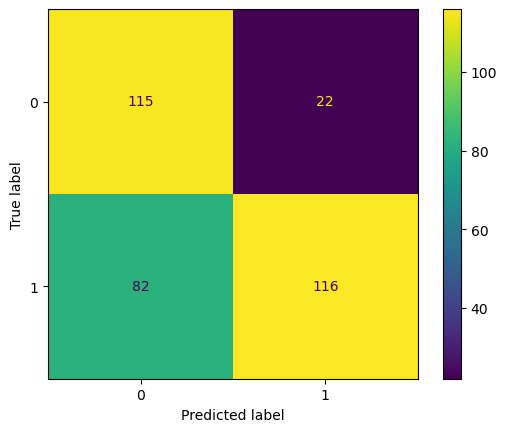

In [18]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

### YOUR CODE HERE ###

cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.

### YOUR CODE HERE ###

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

# Plot the visual in-line.

### YOUR CODE HERE ###

disp.plot()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

The `metrics` module has functions to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Then, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** What do you notice when observing your confusion matrix, and does this correlate to any of your other calculations?

- The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.

- The concentration of true positives stands out relative to false positives. This ratio is why the precision score is so high (0.8406).

- True negatives and false negatives are closer in number, which explains the worse recall score.

## Considerations

**What are some key takeaways that you learned from this lab?**
- The evaluation of the model is important to inform if the model has delivered accurate predictions.
- Splitting the data was important for ensuring that there was new data for the model to test its predictive performance.
- Each metric provided an evaluation from a different standpoint, and accuracy alone was not a strong way to evaluate the model. 
- Effective assessments balance the true/false positives versus true/false negatives through the confusion matrix and F1 score.

**How would you present your results to your team?**
- Showcase the data used to create the prediction and the performance of the model overall.
- Review the sample output of the features and the confusion matrix to indicate the model's performance.
- Highlight the metric values, emphasizing the F1 score.

**How would you summarize your findings to stakeholders?**
- The model created provides some value in predicting an NBA player's chances of playing for five years or more.
- Notably, the model performed better at predicting true positives than it did at predicting true negatives. In other words, it more accurately identified those players who will likely play for more than five years than it did those who likely will not.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged